In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy as sp
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from tqdm import tqdm

%matplotlib inline

In [2]:
def synthetic_data():
    #mean1 = np.concatenate((np.ones(1)*-10,np.ones(12)))
    #mean2 = np.concatenate((np.ones(12),np.ones(1)*10))
    mean1 = np.ones(13)*7
    mean2 = np.ones(13)*10
    mean3 = np.ones(13)*5
    mean4 = np.ones(13)*8
    g1 = np.random.multivariate_normal(mean1, np.eye(13), size=55)
    g2 = np.random.multivariate_normal(mean2, np.eye(13), size=36)
    g3 = np.random.multivariate_normal(mean3, np.eye(13), size=35)
    g4 = np.random.multivariate_normal(mean4, np.eye(13), size=13)

    y1 = np.asarray([1]*55).reshape(55,1)
    y2 = np.asarray([2]*36).reshape(36,1)
    y3 = np.asarray([3]*35).reshape(35,1)
    y4 = np.asarray([4]*13).reshape(13,1)


    #y1 = np.random.choice(5, 297, p=[0.54, 0.18, 0.12, 0.12, 0.04]).reshape(297,1)
    #y2 = np.random.choice(5, 297, p=[0.54, 0.18, 0.12, 0.12, 0.04]).reshape(297,1)
    #y3 = np.random.choice(5, 297, p=[0.54, 0.18, 0.12, 0.12, 0.04]).reshape(297,1)
    #y4 = np.random.choice(5, 297, p=[0.54, 0.18, 0.12, 0.12, 0.04]).reshape(297,1)

    g1 = np.concatenate((g1,y1), axis=1)
    g2 = np.concatenate((g2,y2), axis=1)
    g3 = np.concatenate((g3,y3), axis=1)
    g4 = np.concatenate((g4,y4), axis=1)

    g = np.concatenate([g1,g2,g3,g4], axis=0)

    d = pd.DataFrame(data=g, columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num'])
    return d

#d1 = pd.DataFrame(data=g1, columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num'])
#d2 = pd.DataFrame(data=g2, columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num'])
#d3 = pd.DataFrame(data=g3, columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num'])
#d4 = pd.DataFrame(data=g4, columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num'])
#plt.scatter(g1[:,0], g1[:,1],g1[:,2], c='b')
#plt.scatter(g2[:,0], g2[:,1],g2[:,2], c='r')
#plt.scatter(g3[:,0], g3[:,1],g3[:,2], c='g')
#plt.scatter(g4[:,0], g4[:,1],g4[:,2], c='y')
#plt.show()

In [22]:
data = synthetic_data()

## split data into train and test
cols = list(data.columns)
cols.remove('num')
target = data['num'].copy()
input_data = data[cols].copy()
#target_bin = label_binarize(target, classes=[0, 1, 2, 3, 4])
#test removing healthy patients
dTrain, dTest, targetTrain, targetTest = train_test_split(input_data, target, test_size=0.20, stratify=target)
scaler = preprocessing.StandardScaler().fit(dTrain)
dTrain = scaler.transform(dTrain)
ovo = OneVsOneClassifier(SVC(kernel='linear', probability=True, class_weight='balanced', random_state=0), n_jobs=-1)
ovo.fit(dTrain, targetTrain)

print(len(ovo.estimators_))
print(ovo.estimators_[5].predict_proba(dTest))

dTest = scaler.transform(dTest)
targetTestBin = label_binarize(targetTest, classes=[1, 2, 3, 4])
probas = ovo.decision_function(dTest)
print(np.argmax(probas, axis=1)+1)
pred = ovo.predict(dTest)
print(pred, pred.shape)

cm = confusion_matrix(targetTest, pred)
acc = cm.trace() / cm.sum()
print(acc)

cutpoints_preds = np.zeros(shape=(probas.shape[0],))
#test removing healthy patients

6
[[  3.00000090e-14   1.00000000e+00]
 [  3.00000090e-14   1.00000000e+00]
 [  3.00000090e-14   1.00000000e+00]
 [  3.00000090e-14   1.00000000e+00]
 [  3.00000090e-14   1.00000000e+00]
 [  3.00000090e-14   1.00000000e+00]
 [  3.00000090e-14   1.00000000e+00]
 [  3.00000090e-14   1.00000000e+00]
 [  3.00000090e-14   1.00000000e+00]
 [  3.00000090e-14   1.00000000e+00]
 [  3.00000090e-14   1.00000000e+00]
 [  3.00000090e-14   1.00000000e+00]
 [  3.00000090e-14   1.00000000e+00]
 [  3.00000090e-14   1.00000000e+00]
 [  3.00000090e-14   1.00000000e+00]
 [  3.00000090e-14   1.00000000e+00]
 [  3.00000090e-14   1.00000000e+00]
 [  3.00000090e-14   1.00000000e+00]
 [  3.00000090e-14   1.00000000e+00]
 [  3.00000090e-14   1.00000000e+00]
 [  3.00000090e-14   1.00000000e+00]
 [  3.00000090e-14   1.00000000e+00]
 [  3.00000090e-14   1.00000000e+00]
 [  3.00000090e-14   1.00000000e+00]
 [  3.00000090e-14   1.00000000e+00]
 [  3.00000090e-14   1.00000000e+00]
 [  3.00000090e-14   1.00000000e+00]

In [19]:
#optimal cutpoints

#find the closest point to (0,1) coordinate
def roc01(fpr, tpr):
    tl = [0,1]
    index = None
    opt = np.inf
    for i in range(len(fpr)):
        d = np.linalg.norm(np.array(tl) - np.array([fpr[i], tpr[i]]))
        if d < opt:
            opt = d
            index = i
    return fpr[index], tpr[index]

#Youden's index
def youden_index(fpr, tpr):
    sp = 1-fpr
    se = tpr
    index = None
    opt = -1
    for i in range(len(fpr)):
        pt = sp[i]+se[i]
        if pt > opt:
            opt = pt
            index = i
            
    return fpr[index], tpr[index]
    
#maximize sensitivity
def max_se(fpr, tpr, threshold=1e-4):
    sp = 1-fpr
    se = tpr
    index = None
    opt_se = -1
    opt_sp = -1
    for i in range(len(fpr)):
        if se[i] > opt_se:
            opt_se = se[i]
            opt_sp = sp[i]
            index = i
        elif abs(se[i]-opt_se) <= threshold:
            if sp[i] > opt_sp:
                opt_se = se[i]
                opt_sp = sp[i]
                index = i
    return fpr[index], tpr[index]

#maximize specificity
def max_sp(fpr, tpr, threshold=1e-4):
    sp = 1-fpr
    se = tpr
    index = None
    opt_se = -1
    opt_sp = -1
    for i in range(len(fpr)):
        if sp[i] > opt_sp:
            opt_se = se[i]
            opt_sp = sp[i]
            index = i
        elif abs(sp[i]-opt_sp) <= threshold:
            if se[i] > opt_se:
                opt_se = se[i]
                opt_sp = sp[i]
                index = i
    return fpr[index], tpr[index]
                

Youden optimal cutpoint

0.683273265308


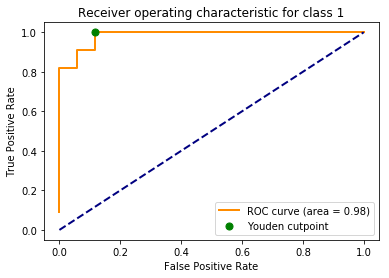

0.68000747787


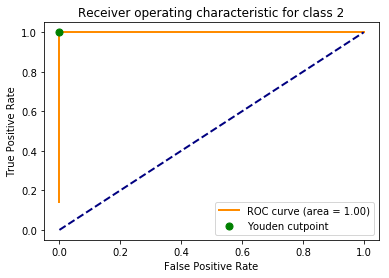

0.666973690968


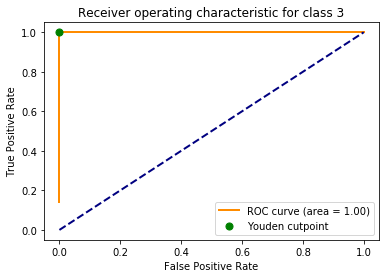

0.14905804295


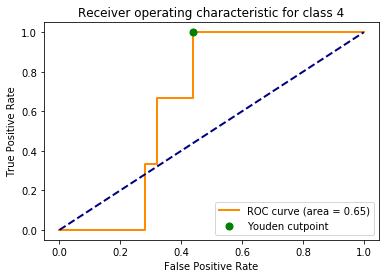

In [38]:
#Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
thresholds = dict()
roc_auc = dict()
#for i in range(5):
#test removing healthy patients
for i in range(4):
    fpr[i], tpr[i], thresholds[i] = roc_curve(target[:, i], proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
#for i in range(5):
#test removing healthy patients
for i in range(4):
    opt_cutpoint = youden_index(fpr[i], tpr[i])
    print(thresholds[i][np.where(fpr[i] == opt_cutpoint[0])[0][0]])
    fig, ax = plt.subplots()
    lw = 2
    ax.plot(fpr[i], tpr[i], color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i], zorder=-1)
    ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', zorder=-1)
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for class ' + str(i+1))
    ax.scatter(opt_cutpoint[0], opt_cutpoint[1], c='g', zorder=1, label='Youden cutpoint', s=50)
    ax.legend(loc="lower right")
    plt.show()

ROC01

0.716702924715


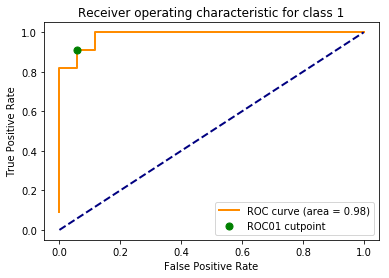

0.68000747787


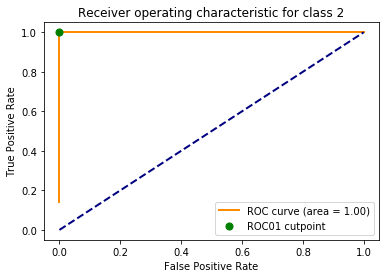

0.666973690968


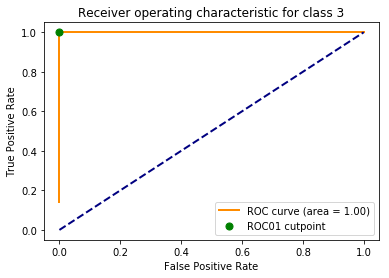

0.14905804295


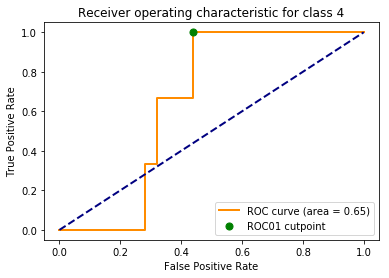

In [39]:
#Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
thresholds = dict()
roc_auc = dict()
#for i in range(5):
#test removing healthy patients
for i in range(4):
    fpr[i], tpr[i], thresholds[i] = roc_curve(target[:, i], proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
#for i in range(5):
#test removing healthy patients
for i in range(4):
    opt_cutpoint = roc01(fpr[i], tpr[i])
    print(thresholds[i][np.where(fpr[i] == opt_cutpoint[0])[0][0]])
    fig, ax = plt.subplots()
    lw = 2
    ax.plot(fpr[i], tpr[i], color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i], zorder=-1)
    ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', zorder=-1)
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for class ' + str(i+1))
    ax.scatter(opt_cutpoint[0], opt_cutpoint[1], c='g', zorder=1, label='ROC01 cutpoint', s=50)
    ax.legend(loc="lower right")
    plt.show()

Maximize sensitivity

0.683273265308


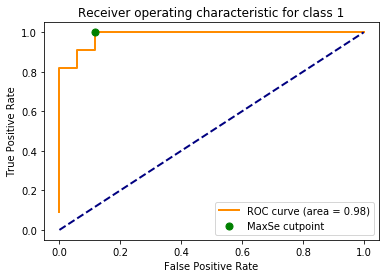

0.68000747787


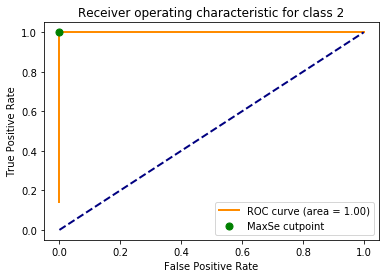

0.666973690968


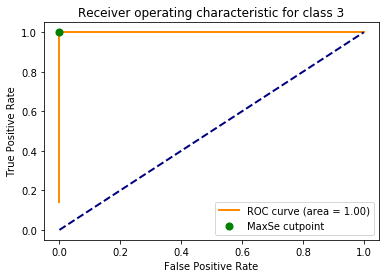

0.14905804295


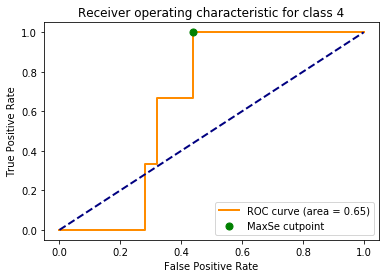

In [40]:
#Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
thresholds = dict()
roc_auc = dict()
#for i in range(5):
#test removing healthy patients
for i in range(4):
    fpr[i], tpr[i], thresholds[i] = roc_curve(target[:, i], proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
#for i in range(5):
#test removing healthy patients
for i in range(4):
    opt_cutpoint = max_se(fpr[i], tpr[i])
    print(thresholds[i][np.where(fpr[i] == opt_cutpoint[0])[0][0]])
    fig, ax = plt.subplots()
    lw = 2
    ax.plot(fpr[i], tpr[i], color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i], zorder=-1)
    ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', zorder=-1)
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for class ' + str(i+1))
    ax.scatter(opt_cutpoint[0], opt_cutpoint[1], c='g', zorder=1, label='MaxSe cutpoint', s=50)
    ax.legend(loc="lower right")
    plt.show()

Maximize specificity

[ 0.78606819  0.74669627  0.71670292  0.7100714   0.68327327  0.6600247
  0.25314516]
0.786068186447


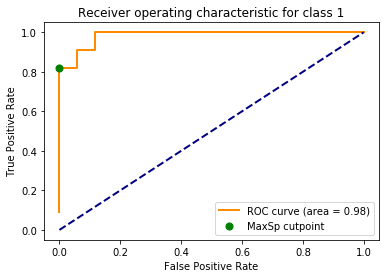

[  6.80007478e-01   6.37675055e-01   1.01402861e-05]
0.68000747787


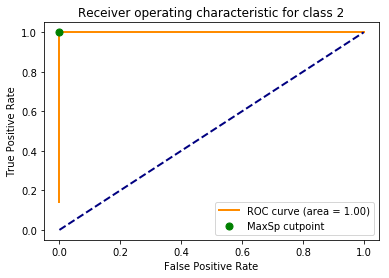

[  6.66973691e-01   3.91602218e-01   3.20515476e-07]
0.666973690968


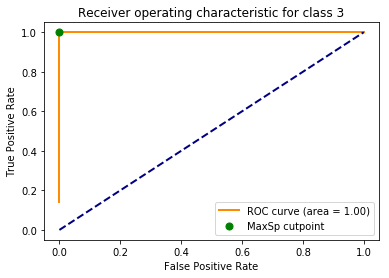

[ 1.18465462  0.18465462  0.17175552  0.17145989  0.17012962  0.16546852
  0.14905804  0.12525475  0.06089311]
1.18465461969


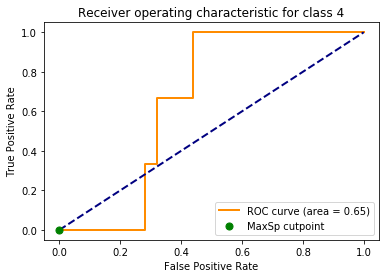

In [41]:
#Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
thresholds = dict()
roc_auc = dict()
#for i in range(5):
#test removing healthy patients
for i in range(4):
    fpr[i], tpr[i], thresholds[i] = roc_curve(target[:, i], proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
#for i in range(5):
#test removing healthy patients
for i in range(4):
    print(thresholds[i])
    opt_cutpoint = max_sp(fpr[i], tpr[i])
    print(thresholds[i][np.where(fpr[i] == opt_cutpoint[0])[0][0]])
    fig, ax = plt.subplots()
    lw = 2
    ax.plot(fpr[i], tpr[i], color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i], zorder=-1)
    ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', zorder=-1)
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for class ' + str(i+1))
    ax.scatter(opt_cutpoint[0], opt_cutpoint[1], c='g', zorder=1, label='MaxSp cutpoint', s=50)
    ax.legend(loc="lower right")
    plt.show()

In [15]:
ova = pd.read_csv('confusion_matrix_ova.csv', header=None)
print(ova)

      0    1    2    3
0  11.0  0.0  0.0  0.0
1   0.0  7.0  0.0  0.0
2   3.0  0.0  4.0  0.0
3   2.0  0.0  0.0  1.0
